<a href="https://colab.research.google.com/github/quintonmills/Binary-Clasification-Model/blob/main/BinaryClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

nSamples = 1000
x, y = make_circles(nSamples, noise=0.03, random_state=42)

x_train = x[:800]
y_train =  y[:800]
x_test = x[800:]
y_test = y[800:]


tf.random.set_seed(42)
model = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

#Create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # offer scheduler every epoch to traverse a set of learning rate values

#pass lr scheduler callback
history_10 = model.fit(x_train, y_train, epochs = 20) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
#visualising predictions
import numpy as np
def plot_decision_boundary(model, x, y):
  """
  plots the decision boundary created by a model prediction on x
  """
  #define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:,0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:,1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #return 100 evenly spaced between x_min & x_max
                       np.linspace(y_min, y_max, 100))
  #Create x values(were gonna make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]#c_ translates objects to concatenation along the second axis
                                    #stack 2d arrays together

#make predictions
  y_pred = model.predict(x_in)
#check for multiclass
  if len(y_pred[0]) > 1:
    print("Doing  multiclass classification")
  #we have to reshape our our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

#plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmpa=plt.cm.RdYlBu, alpha= 0.7)
#we need to plot the 0th axis of x and x's first axis
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
#Set the minimums
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


Doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'cmpa'


Doing binary classification


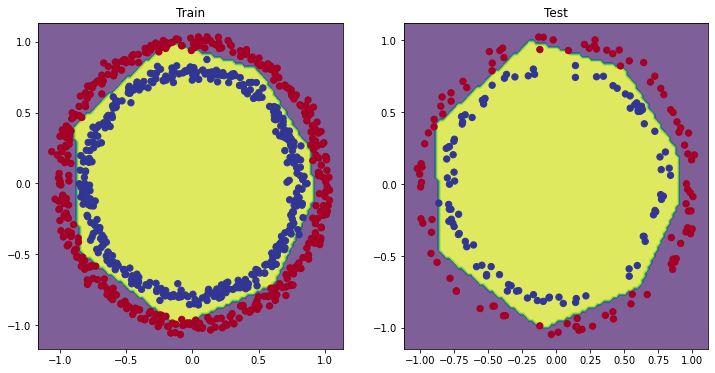

In [ ]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) #row 1, 2 columns, section 1
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1,2,2) #1 row, two columns, and the second section
plt.title("Test")
plot_decision_boundary(model, x = x_test, y = y_test)
plt.show()


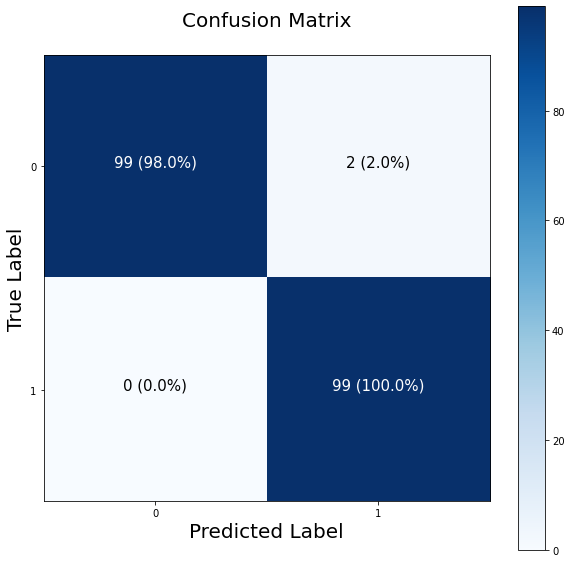

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
y_preds = model.predict(x_test)
figsize = (10, 10)
#create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
#creating normalized feature
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #divide our conusion matrix by the sum to normalize it
n_classes = cm.shape[0] #setting the number of classes to two
fig, ax = plt.subplots(figsize=figsize)
#create matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0]) #set the labels to a range of our confusion matrix shape on the zeroth axis (2)
  #so it will be zero to one

#label the asxis
ax.set(title="Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes), # number of little dashes that we want to have on our figure
       xticklabels = labels,#in case of binary classification its going to be the range
       yticklabels = labels
       )

#set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
#set threshold for different colors
threshold = (cm.max() + cm.min()) /2 #will give confusion matrix different shades of squares

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #itertools is going to iterate through whatever we pass it
  plt.text(j,i,f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size=15)

